<a href="https://colab.research.google.com/github/adasegroup/ML2023_seminars/blob/master/seminar7/Seminar_GB_Solutions_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar: Gradient Boosting
Course: Machine Learning by professor Evgeny Burnaev
<br>
Author: Andrey Lange and Alexander Marusov

### Main statements about Decision Trees, Bagging and Random Forests. 

- **DECISION TREES**. With increasing the *max_depth* parameter the training loss of decision tree will be closer to zero, but test loss is high. This means, that our model has bad generalization capability and we have **overfitting**. Consequently, we need somehow prevent overfitting. Of course we can choose the best *max_depth* parameter according to test, but it is not the only one solution. 

- **BAGGING = DECISION TREE + BOOTSTRAP**. We can use several decision trees, which learn on different train sets, which were received using bootstrap procedure. Bootsrapped dataset contains the same number of samples as original data but some of them are included with some number of their copies, and some of them are not included. To make a final prediction we will average predictions across decision trees. Since we will have different trees, the predictions will be more less independent and, consequently, overfitting will be decreased.

- **RANDOM FOREST = BAGGING + DIFFERENT FEATURES**.
To increase generalization capability of the model (by making assumption about independency of trees stronger) we want to take not only different samples, but also different features as well. In Random Forest we have several decision trees, which are learned not only on different train samples, but also on different features as well.



The main disadvantage of the ensembles above is that the learning process in undirected, i.e. decision trees don't know anything about mistakes of the others models. To eliminate this problem we will try the **Boosting** idea.

### The problem statement


The solution is found in the form of sum over random trees $h_m(x)$,
$$F(x) = \sum_{m=1}^{M} h_m(x).$$

The additive model is built in a greedy fashion:
$$f_m(x) = f_{m-1}(x) + h_m(x).$$

Having loss function $L(y, f)$, we find every new tree from the optimization
$$h_m =  \arg\min_{h} \sum_{i=1}^{n} L(y_i, f_{m-1}(x_i) + h(x_i)).$$









### How the problem is solved


The initial model $f_0(x)$ is problem specific, for least-squares regression one usually chooses the mean of the target values.

To solve the task above we should divide into two parts:

- At the beggining we should find values $s_i$, which our random trees should have on the data $x_i$, i.e. $s_i = h(x_i)$. To solve this task we should find minimum of $F(s):$ 
$$F(s) =  \sum_{i=1}^{n} L(y_i, f_{m-1}(x_i) + s_i)).$$ Here $s = (s_1, s_2, ... , s_n)$. As we know from the math, the gradient of the function will show the direction of the highest increasing of the function. Since we want to minimize the function, we should go in the direction, which is opposite to the gradient. This direction is also-called **antigradient**. Currently $s = (0, 0, ... , 0)$, because $$F(0) =  \sum_{i=1}^{n} L(y_i, f_{m-1}(x_i)))$$ So we need to make a gradient step from fucntion $F$ in point $s = (0, 0, ... , 0)$. The gradient step is the next formula: $$s_{new} = s_{old} - \nabla F(s)|_{s=s_{old}}$$ Since $s_{old} = (0, 0, ... , 0)$, the components of new vector $s$ should be: $$s_i = -\frac{\partial L(y_i, f_{m-1}(x_i))}{\partial f_{m-1}(x_i)}.$$

- After that we can find $h_m(x)$ just by solving usual supervised learning task with the data $(x_1, s_1), (x_2, s_2), ..., (x_n, s_n)$. 


Before the final step in some versions of Gradient Boosting you should find $$\gamma_m = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, f_{m-1}(x_i)
- \gamma \frac{\partial L(y_i, f_{m-1}(x_i))}{\partial f_{m-1}(x_i)})$$ Finally, $$f_m(x) = f_{m-1}(x) + \nu \gamma_m h_m(x)$$ 



Also there can be just simple sum $f_m(x) = f_{m-1}(x) + h_m(x)$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

## Example 1: Gradient Boosting for regression

In [ ]:
def get_dataset_1d():
    # prepare dataset
    n = 1                      # number of features
    N = 100**n                 # number of samples
    np.random.seed(0)
    X = np.random.random((N, n))*3
    coeffs = 1 +  2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((N, 1))/3
    y = y.ravel()
    
    return (X, y)
    
def plot_results(X, y, y_pred, title=''):
    plt.plot(X, y, '*b')
    plt.plot(X, y_pred, '.r')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('y')

    plt.show()


---

### Question 1.
In the following example a Gradient Boosting regression is performed by only 1 tree and very small shrinkage `learning_rate=1e-10`. The solution looks like a constant.

1.1. Why it looks like a constant?
<br>
1.2. Try to find that constant value taking into account that `loss='squared_error'` and draw it on the same plot.

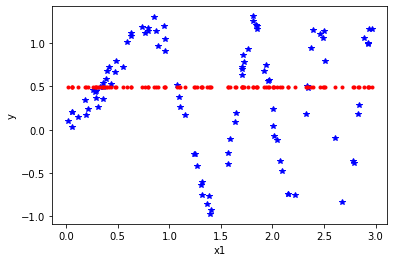

In [ ]:
X, y = get_dataset_1d()

clf = GradientBoostingRegressor(loss='absolute_error', max_depth=1, learning_rate=1e-10, n_estimators=1)
clf.fit(X, y)
y_pred = clf.predict(X)

plot_results(X, y, y_pred)

### Solution 1.
1.1. In case of only 1 tree the final boosting is
$$f_1(x) = f_0(x)+ \gamma_1 h_1(x)$$
Since $\gamma_1$ is too small, $f_1(x)\approx f_0(x)$ and $f_0(x)$ is the initialization value
$$f_0(x) = {\rm argmin}_{f} \sum_{i=1}^{n} L(y, f).$$

1.2.
For the loss function $L(y, f) = (y - f)^2/2$ it is the mean of targets:
$$ f_0(x) = \frac{1}{n}\sum_{i=1}^n y_i.$$
You can add 
```
plt.plot(X, [np.mean(y)]*len(y), 'ok')
```
before `plot_results()` call.


---

### Question 2. 
Solve above question for `loss='absolute_error'`.

### Solution 2. 
Change `np.mean()` for `np.median()`.


---

### Question 3. 
Some managers of industrial Data Science projects said me that each tree in Gradient Boosting is fit to the targets that are simply the differences $y_i-f_{m-1}(x_i)$ between the values $y_i$ and the current approximation $f_{m-1}(x_i)$ found on the previous step $m-1$. When is it correct?

### Solution 3.
It is true in case of Gradient Boosting for regression with squared error loss 
$$L(y_i, f(x_i)) = \frac{1}{2}[y_i-f(x_i)]^2.$$


The gradients
$$ r_{im} = - \left[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}\right]_{f=f_{m-1}}$$
are calculated for each data point $(x_i, y_i)$ on every step $m$. Then a regression tree is fit to the targets $r_{im}$. For the squared error loss the negative gradient is exactly the difference 
$$r_{im} = y_i-f_{m-1}(x_i).$$


---

### Question 4*. 
Actually, the managers from the question above said not only to what the trees are fit but also that the current solution is updated by simply adding each new tree multiplied by a shrinkage parameter and ignore any sophisticated math! :[]

The following code shows 2 ways of using the Gradient Boosting for regression:
1. Using the class `GradientBoostingRegressor()` - as it should be done if you use scikit-learn
2. Our own implementation by adding a tree step by step with shrinkage

Ensure that the pictures are the same no matter how you change the hyperparameters `max_depth`, `n_estimators` and `learning_rate`!

In our implementation we fit each tree to the targets $y_i-f_{m-1}(x_i)$ (if you answered on the above question you know that it is correct here) multiply by shrinkage $\nu$ and add to the current model. But it seems that something is missing in our code. No matter how exactly the Gradient Boosting is implemented in scikit-learn, there are many slightly different variants. Assume that it is as described here https://scikit-learn.org/stable/modules/ensemble.html#mathematical-formulation, where the steepest descent chooses the optimal step length
$$
\gamma_m = \arg\min_{\gamma} \sum_{i=1}^{n} 
L
\left(
y_i, f_{m-1}(x_i)
- \gamma \nabla_F L(y_i, f_{m-1}(x_i))
\right),
$$
which is used for the model update
$$
f_m(x) = f_{m-1}(x) - \gamma_m \sum_{i=1}^{n} \nabla_F L(y_i, f_{m-1}(x_i)).
$$
But we did not implement it! Justify the correctness of our easy implementation of GB.

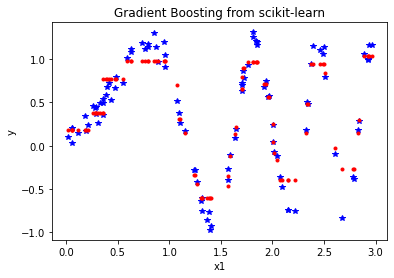

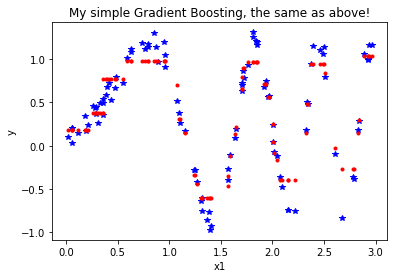

In [ ]:
X, y = get_dataset_1d()

max_depth = 1
n_estimators = 50
learning_rate = 1 # 0.8                            # shrinkage

# usual Gradient Boosting call
clf = GradientBoostingRegressor(loss='squared_error', max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)
clf.fit(X, y)
f = clf.predict(X)
plot_results(X, y, f, 'Gradient Boosting from scikit-learn')

# my Gradient Boosting implementation
clf = DecisionTreeRegressor(max_depth=max_depth)
f = np.mean(y)                      # initialization
for m in range(1, n_estimators+1):
    f = f + clf.fit(X, y - f).predict(X) * learning_rate # fit to the difference and shrink
plot_results(X, y, f, 'My simple Gradient Boosting, the same as above!')

### Solution 4*.

For the squared error loss $L(y_i, f(x_i)) = \frac{1}{2}[y_i-f(x_i)]^2$ we have
$$ L\left(y_i, f_{m-1}(x_i) - \gamma \nabla_F L(y_i, f_{m-1}(x_i))\right) =
 \frac{1}{2} (1 - \gamma)^2 (y_i - f_{m-1}(x_i))^2,
$$
and thus $\gamma_m=1$ or in other words we can skip the steepest descent in this case.

## Example 2: Gradient Boosting for classification.

Let's return to the task from the previous seminar and try to solve it using gradient boosting!

### 1. EDA and Data preprocessing

In [ ]:
rand_state = 123

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2022_seminars/master/seminar5/give_me_some_credit.csv', index_col=0)

In [ ]:
df_kaggle_test = pd.read_csv('https://raw.githubusercontent.com/Astralex98/Give-me-some-credit-Kaggle-/main/cs-test.csv', index_col=0)

In [ ]:
df_kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [ ]:
# There are no any labels in test, so we just remove this column
df_kaggle_test = df_kaggle_test.drop(['SeriousDlqin2yrs'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
# Check for imbalance
df_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

**Summary of quick EDA:**

1. There are some missing values

2. Our classification task is highly imbalanced

#### 1.1 Missing values

Since random forests can't deal with NaNs, we should somehow deal with them. About strategies for dealing with missing values:https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e 

We can see, that features **MonthlyIncome**(20%) and **NumberOfDependents** (3%) have some missing values. From our intuition we can understand that **MonthlyIncome** is highly important feature for our task. Consequently, dropping those data-points could be a not a good idea. Now, for the sake of simplicity, we can just impute NaNs with means of corresponding features.

In [ ]:
# Method to preprocess data
def df_remove_nans(df):

  # Deal with NaNs
  df["MonthlyIncome"] = df["MonthlyIncome"].replace(np.NaN,  df["MonthlyIncome"].mean())
  df["NumberOfDependents"] = df["NumberOfDependents"].replace(np.NaN,  df["NumberOfDependents"].mean())

  # small check for NaNs
  if ((df["MonthlyIncome"].isnull().values.any() == True) or (df["NumberOfDependents"].isnull().values.any())):
    print("There are some NaNs here!")
    return None
  
  return df

In [ ]:
# remove nans data
df_train = df_remove_nans(df_train)
X_kaggle_test = df_remove_nans(df_kaggle_test)

### 2. Dividing data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['SeriousDlqin2yrs'], axis=1), df_train['SeriousDlqin2yrs'], test_size = 0.3, random_state=rand_state, shuffle = True)

In [ ]:
 # use only each 10th sample to save a time
X_train = X_train.iloc[::10, :]
y_train = y_train.iloc[::10] 

In [ ]:
n_features = X_train.shape[1]

### 3. Training

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(random_state=rand_state)

In [ ]:
param_grid = {'n_estimators' : [20, 30, 40], 
              'max_depth': [2, 5, 7, 9], 
              'max_features': ['log2', 'sqrt', n_features], 
              'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}

In [ ]:
clf = RandomizedSearchCV(clf, param_grid, cv=5, scoring='roc_auc', n_iter = 10, random_state = rand_state)

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 38.5 s, sys: 219 ms, total: 38.7 s
Wall time: 54.5 s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
                   param_distributions={'learning_rate': [0.05, 0.075, 0.1,
                                                          0.25, 0.5, 0.75, 1],
                                        'max_depth': [2, 5, 7, 9],
                                        'max_features': ['log2', 'sqrt', 10],
                                        'n_estimators': [20, 30, 40]},
                   random_state=123, scoring='roc_auc')

### 4. Feature importance and feature selection

**1. Feature selection**

We try to find the most important features.

**2. Dimensionality reduction**

We have a lot of useful features and for some reasons we want to reduce the number of used features.

**3. Feature generation**

We want to create a feature description for an object (e.g. image).
Earlier scientists used some handcrafted features (e.g. HoG). Now neural networks create features automatically.



In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Fit model using each importance as a threshold
model = clf.best_estimator_

# Weights of each feature are thresholds
thresholds = sorted(model.feature_importances_)

In [ ]:
# Here we collect the auc score for corresponding set of features, whos importance
# is higher than a current threshold
aucs_list = []

In [ ]:
%%time
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)

 # train model
 new_clf = GradientBoostingClassifier(random_state=rand_state)
 new_clf.fit(select_X_train, y_train)

 # eval model
 select_X_test = selection.transform(X_test)
 y_predict_proba = new_clf.predict_proba(select_X_test)
 roc_auc = roc_auc_score(y_test, y_predict_proba[:, 1])
 aucs_list.append((thresh, select_X_train.shape[1], roc_auc))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/p

CPU times: user 11.9 s, sys: 37.4 ms, total: 12 s
Wall time: 12 s


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
for elem in aucs_list:
  thresh, num_features, roc_auc = elem
  print("Thresh=%.3f, n=%d, AUC: %.5f" % (thresh, num_features, roc_auc))

Thresh=0.032, n=10, AUC: 0.86436
Thresh=0.035, n=9, AUC: 0.86389
Thresh=0.054, n=8, AUC: 0.86295
Thresh=0.077, n=7, AUC: 0.86087
Thresh=0.089, n=6, AUC: 0.86031
Thresh=0.096, n=5, AUC: 0.85876
Thresh=0.101, n=4, AUC: 0.85158
Thresh=0.109, n=3, AUC: 0.85005
Thresh=0.192, n=2, AUC: 0.82451
Thresh=0.216, n=1, AUC: 0.66408


You can see, that if we will use even 2 features the final AUC will be only on 0.04 worser than if we take 10 features. In current task we have not much features, consequently, we don't need to reduce number of features. But in some cases there could be too much features and you will need to select from them the most important ones.

### 5. Evaluating

In [ ]:
def plot_roc_curve(clf, x, y):
  plt.figure(figsize=[9, 6])
  fpr, tpr, _ = roc_curve(y, clf.predict_proba(x)[:, 1])
  plt.plot(fpr, tpr, 'r', label='train')
  plt.title('ROC curve')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.show()

In [ ]:
print("Random search with roc_auc")
print("Best parameters:", clf.best_params_)
print("Best cross-validation score (auc_roc)): {:.3f}".format(clf.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])))

Random search with roc_auc
Best parameters: {'n_estimators': 40, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.05}
Best cross-validation score (auc_roc)): 0.839
Test set AUC: 0.863


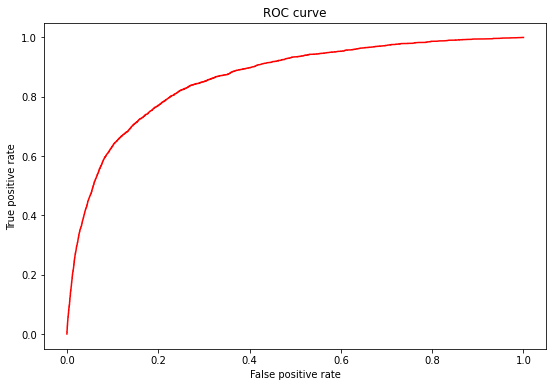

In [ ]:
plot_roc_curve(clf, X_test, y_test)

### 5. Create submission to Kaggle

In [ ]:
predictions = clf.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
predictions.shape

(101503,)

In [ ]:
# Save the predictions to a CSV file
sub = pd.read_csv('https://raw.githubusercontent.com/Astralex98/Give-me-some-credit-Kaggle-/main/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('MyGBSubmission.csv', index=False)
sub

,Id,Probability
0,1,0.075584
1,2,0.056789
2,3,0.020939
3,4,0.048173
4,5,0.079745
...,...,...
101498,101499,0.035984
101499,101500,0.296324
101500,101501,0.016545
101501,101502,0.030896


As a result (if we train on full data) we will have:

**Public** score = 0.85957

**Private** score = 0.86458

You can see that our results were slightly improved with comparison to random forest!